In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from tqdm.notebook import tqdm
from scipy import  stats

In [2]:
data = pd.read_csv('STORAGE_data/es-1min_FULL.csv')
normal_datetime = data
normal_datetime.index = pd.to_datetime(normal_datetime.date + ' ' + normal_datetime.time)

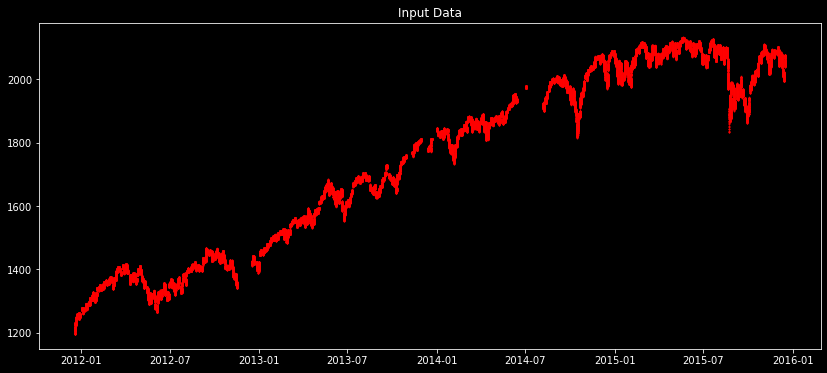

In [3]:
plt.style.use('dark_background')
plt.figure(figsize=(14,6))
plt.title('Input Data')
plt.plot(normal_datetime.open, 'o', markersize=.8, alpha=.7, color='red')
plt.show()

TIME LAGS CREATED:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 24

  0%|          | 0/256 [00:00<?, ?it/s]

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2706/2271068490.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_b = (1 / m) * _buff_
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_2706/2271068490.py:32: RuntimeWarning: invalid value encountered in double_scalars
  sigma_b = (1 / m) * _buff_


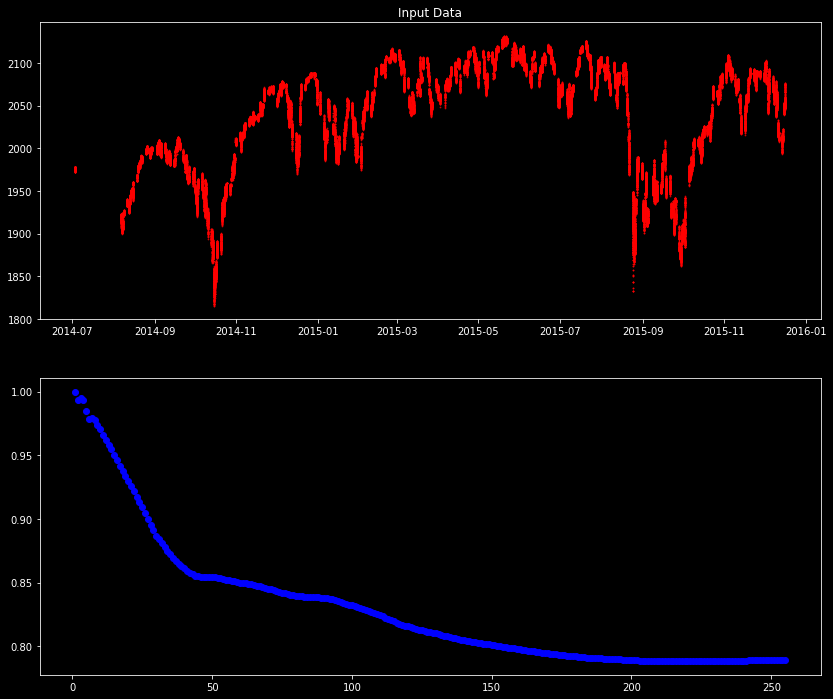

In [9]:
"""
SOURCE:     https://www.youtube.com/watch?v=LZHQdcaC964
"""
def variance_ratio(q_position, df: pd.DataFrame):
    MR = list()

    result_array = list()
    q_array = list()
    plt.style.use('dark_background')
    plt.figure(figsize=(14,12))
    plt.subplot(2,1,1)
    plt.title('Input Data')
    plt.plot(df.close, 'o', markersize=.8, alpha=.7, color='red')
    plt.subplot(2,1,2)
    #   Create time_lags like 2 ** k
    #time_lags = [1] + [2 ** i for i in range(1, q_position+1)]
    ret = np.log(df.close.dropna())
    #ret = ret.pct_change()[1:].dropna()
    #ret = ret.diff().dropna()
    time_lags = np.arange(0, 2 ** q_position, 1)
    print('TIME LAGS CREATED: ', time_lags)
    for EA, time_lag in tqdm(enumerate(time_lags), total=len(time_lags)):
        buff_size = len(ret)
        means = (1 / buff_size) * np.sum(ret.diff().dropna())
        m = time_lag * (buff_size - time_lag + 1) * (1 - (time_lag / buff_size))
        sigma_a = (1 / (buff_size - 1)) * np.sum(np.square(ret.diff().dropna() - means))
        _buff_ = 0
        _arr_buff_ = ret.values
        for k in range(time_lag, buff_size):
            _buff_ += np.square(_arr_buff_[k] - _arr_buff_[k - time_lag] - time_lag * means)
        del _arr_buff_
        sigma_b = (1 / m) * _buff_
        result = (sigma_b / sigma_a)
        plt.plot(time_lag, result, 'o', color='blue')
        result_array.append(result)
        q_array.append(time_lag)
    return result_array, q_array
"""     Not work correctly
        buff = ret.rolling(time_lag).sum().dropna()
        VARIANCE_ARRAY.append(np.std(buff, ddof=1))
        VARIANCE_RATIO_ARRAY.append((VARIANCE_ARRAY[EA] / (time_lag * VARIANCE_ARRAY[0])) - 1)
        #   QUESTION: len of buffer or len of raw data?
        SIGMA_FOR_VR.append(2 * (time_lag - 1) * (2 * time_lag - 1) / (3 * time_lag * len(buff)))
        STD_FOR_VR.append(np.sqrt(SIGMA_FOR_VR[EA]))
        Z_STAT.append((VARIANCE_RATIO_ARRAY[EA]) / STD_FOR_VR[EA])
        P_VALUE.append(round(stats.norm.cdf(abs(Z_STAT[EA])), 4))"""
"""
    print(VARIANCE_RATIO_ARRAY)
    print(SIGMA_FOR_VR)
    print(STD_FOR_VR)
    print(Z_STAT)
    print(P_VALUE)"""


res, q = variance_ratio(8, normal_datetime['2014-07': '2016-01'].dropna())

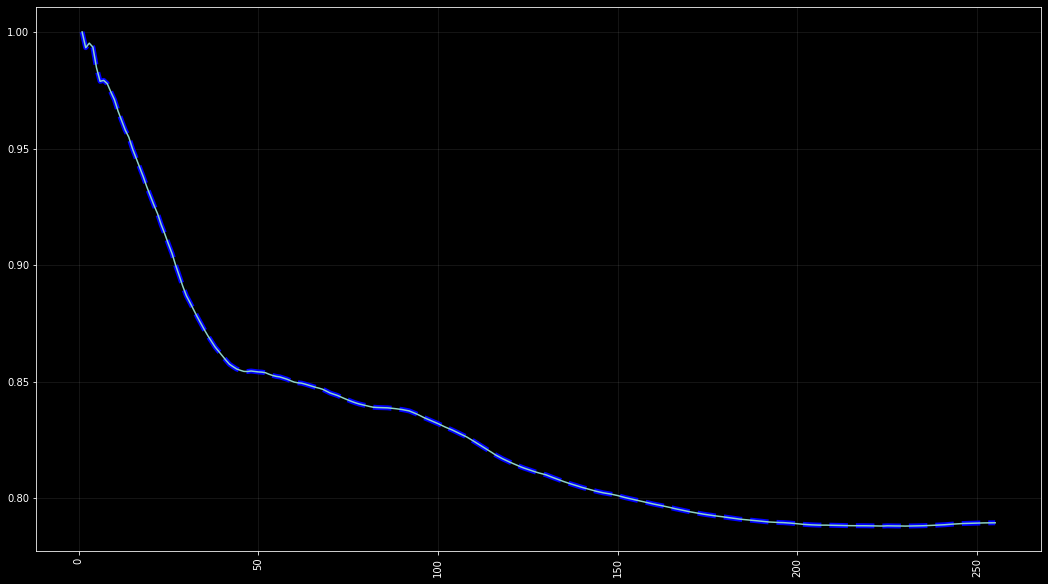

In [47]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation=90)
plt.grid(alpha=0.1)
plt.plot(q, res, '--', color='blue', linewidth=5)
plt.plot(q, res, marker='o', markersize=0.0001)
plt.show()

TIME LAGS CREATED:  [   0   20   40   60   80  100  120  140  160  180  200  220  240  260
  280  300  320  340  360  380  400  420  440  460  480  500  520  540
  560  580  600  620  640  660  680  700  720  740  760  780  800  820
  840  860  880  900  920  940  960  980 1000 1020]


  0%|          | 0/52 [00:00<?, ?it/s]

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_707/2614748230.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_b = (1 / m) * _buff_
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_707/2614748230.py:29: RuntimeWarning: invalid value encountered in double_scalars
  sigma_b = (1 / m) * _buff_


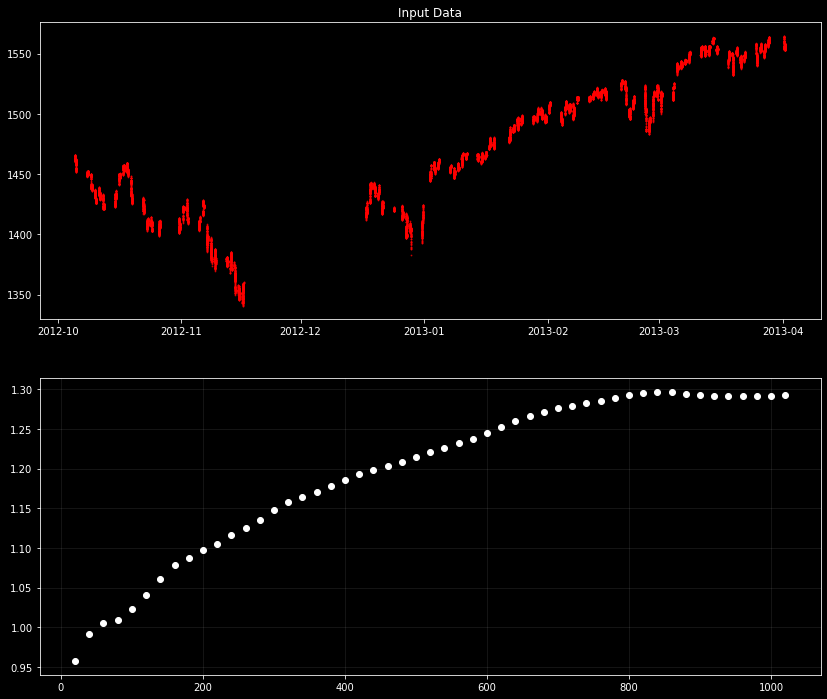

In [11]:
def variance_ratio(q_position, df: pd.DataFrame):
    MR = list()

    result_array = list()
    q_array = list()
    plt.style.use('dark_background')
    plt.figure(figsize=(14,12))
    plt.subplot(2,1,1)
    plt.title('Input Data')
    plt.plot(df.close, 'o', markersize=.8, alpha=.7, color='red')
    plt.subplot(2,1,2)
    #   Create time_lags like 2 ** k
    #time_lags = [1] + [2 ** i for i in range(1, q_position+1)]
    ret = np.log(df.close.dropna())
    #ret = ret.pct_change()[1:].dropna()
    #ret = ret.diff().dropna()
    time_lags = np.arange(0, 2 ** q_position, 50)
    print('TIME LAGS CREATED: ', time_lags)
    for EA, time_lag in tqdm(enumerate(time_lags), total=len(time_lags)):
        buff_size = len(ret)
        means = (1 / buff_size) * np.sum(ret.diff().dropna())
        m = time_lag * (buff_size - time_lag + 1) * (1 - (time_lag / buff_size))
        sigma_a = (1 / (buff_size - 1)) * np.sum(np.square(ret.diff().dropna() - means))
        _buff_ = 0
        _arr_buff_ = ret.values
        for k in range(time_lag, buff_size):
            _buff_ += np.square(_arr_buff_[k] - _arr_buff_[k - time_lag] - time_lag * means)
        del _arr_buff_
        sigma_b = (1 / m) * _buff_
        result = (sigma_b / sigma_a)
        plt.plot(time_lag, result, 'o', color='white')
        plt.grid(alpha=.1)
        result_array.append(result)
        q_array.append(time_lag)
    return result_array, q_array

res, q = variance_ratio(10, normal_datetime['2012-10-05': '2013-04-01'].dropna())